# HC7 Data Exploration and Cleaning



### YOUR TURN!

Now that you know how to explore the data, clean the data, obtain statistics about the data, visualize the data and select a subset of the data based on the value in a particular column (e.g. neighbourhood_group == 'Staten Island"), think about how you want to explore the data for your analysis:    
  1. As a group, think about an overall data-driven discussion of your borough and how it compares to the others.  
  2. Individually, analyze the data in your borough and compare to the data for other boroughs.
  
As you explore your data, keep in mind your analysis and findings from HC2 and HC3 and see if you can make any connections, or if you find that the data supports those findings.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import gdown

# download the file from our drive
!wget https://huntercsci127.github.io/files/clean_heat_dataset.csv
#list the files in the current directory to confirm the file is there
!ls

clean_heat = pd.read_csv("clean_heat_dataset.csv")

columns= ['Borough, Block, Lot #', 'Street Address', 'Postcode', 'Borough', 'Utility', 'Building Manager', 'Owner', 'Owner Address', 'Owner Telephone', 'DEP Boiler Application #', '#6 Deadline', 'Boiler Model', '# of Identical Boilers', 'Boiler Capacity (Gross  BTU)', 'Boiler Installation Date', 'Boiler Age Range', 'Est. Retirement Year', 'Burner Model', 'Primary Fuel', 'Total Gallons (High)', 'Total Gallons (Low)', 'Total MMBTU (High)', 'Total MMBTU (low)', 'Greener Greater Buildings', 'GGB Deadline', 'Building Type', 'Council District', 'Community Board', 'Bldg Sqft', '# of Bldgs', '# of Floors', '# of Res. Units', 'Total Units', 'Year Built', 'Condo?', 'Coop?', 'Latitude', 'Longitude', 'Census Tract', 'BIN', 'BBL', 'NTA']
cat_columns= ['Street Address', 'Borough', 'Utility', 'Building Manager', 'Owner','Owner Address','Owner Telephone', 'DEP Boiler Application #','Boiler Model','Boiler Age Range', 'Burner Model', 'Primary Fuel', 'Building Type', 'Community Board', 'Bldg Sqft', 'Condo?', 'Coop?', 'NTA']
num_columns=['Borough, Block, Lot #','Postcode','#6 Deadline','# of Identical Boilers','Boiler Capacity (Gross  BTU)', 'Boiler Installation Date',  'Est. Retirement Year', 'Total Gallons (Low)', 'Total MMBTU (High)', 'Total MMBTU (low)', 'Greener Greater Buildings', 'GGB Deadline', 'Council District', '# of Bldgs', '# of Floors', '# of Res. Units', 'Total Units', 'Year Built','Latitude', 'Longitude', 'Census Tract', 'BIN', 'BBL']
clean_heat[num_columns]=clean_heat[num_columns].fillna(value=0)
clean_heat[cat_columns]=clean_heat[cat_columns].fillna(value="")

--2024-11-26 22:34:06--  https://huntercsci127.github.io/files/clean_heat_dataset.csv
Resolving huntercsci127.github.io (huntercsci127.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to huntercsci127.github.io (huntercsci127.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1903535 (1.8M) [text/csv]
Saving to: ‘clean_heat_dataset.csv’

clean_heat_dataset. 100%[===================>]   1.81M  --.-KB/s    in 0.07s   

2024-11-26 22:34:06 (24.9 MB/s) - ‘clean_heat_dataset.csv’ saved [1903535/1903535]

clean_heat_dataset.csv	sample_data


First, we import the necessary libraries, download and read in our data, and clean it to make sure there are no null/empty values.

In [ ]:
boroughs = clean_heat.groupby("Borough")
borough_stats = boroughs.describe()
print("Boiler Capacity Statistics per Borough: \n\n", borough_stats["Boiler Capacity (Gross  BTU)"])

Boiler Capacity Statistics per Borough: 

                 count         mean           std  min    25%    50%      75%  \
Borough                                                                        
Bronx          1498.0     4.614559      3.790257  0.0  2.945  4.100   5.2500   
Brooklyn        129.0     4.779380      3.642012  1.0  2.770  3.800   6.1000   
Manhattan      2597.0  1940.990920  98526.670159  0.0  3.340  4.500   6.6000   
Queens          559.0     5.634007      3.481657  0.0  3.535  5.000   6.3000   
Staten Island     6.0     9.791667      5.905287  2.6  6.300  8.125  15.0875   

                     max  
Borough                   
Bronx              105.0  
Brooklyn            33.0  
Manhattan      5021000.0  
Queens              30.2  
Staten Island       16.8  


Here, we group our data by the boroughs and print the Boiler Capacity statistics. We can see that Manhattan has the highest average and maximum boiler capacity, indicating that it may be the primary contributor to the pollution. All the other boroughs are significantly lower in average boiler capacity, most likely because of their lack of tall, large buildings that serve a lot of people and are usually concentrated in Manhattan. However, we also see that Manhattan has an outrageously high standard deviation, so there is clearly some disparity in its data, making the outliers in the Manhattan category cause the entire borough to be an outlier itself. Furthermore, the Bronx, Manhattan, and Queens all have a minimum of 0 gross BTU, which shows that they have buildings that don't even use boilers, whereas all of the buildings in Brooklyn and Staten Island do use boilers. This may be because there is mainly housing in Brooklyn and Staten Island.

In [ ]:
print("Total Gallons (High) Statistics per Borough: \n\n", borough_stats["Total Gallons (High)"])
print("\n")
print("Total Gallons (Low) Statistics per Borough: \n\n", borough_stats["Total Gallons (Low)"])

Total Gallons (High) Statistics per Borough: 

                 count          mean           std      min      25%      50%  \
Borough                                                                        
Bronx          1498.0  1.220819e+05  1.282715e+06      0.0  27521.0  38653.5   
Brooklyn        129.0  5.149549e+04  5.365268e+04      0.0  27923.0  37960.0   
Manhattan      2597.0  1.411446e+06  6.554614e+07      0.0  29952.0  44800.0   
Queens          559.0  1.917891e+05  2.314938e+06      0.0  29984.5  48728.0   
Staten Island     6.0  1.427140e+05  1.174209e+05  28361.0  62415.0  95082.5   

                     75%           max  
Borough                                 
Bronx           54691.50  3.477172e+07  
Brooklyn        57488.00  3.774820e+05  
Manhattan       73913.00  3.338956e+09  
Queens          68857.50  5.395612e+07  
Staten Island  233494.75  3.066000e+05  


Total Gallons (Low) Statistics per Borough: 

                 count          mean           std      

Here, we print the Total Gallons (High and Low) statistics for all the boroughs. We can see that Manhattan has the highest mean for both and Brooklyn has the lowest. This might indicate that Manhattan is the greatest contributor to the pollution and Brooklyn is the smallest. However, this does not particularly align with the "New York City Borough Emissions Comparison" chart, which instead shows that Staten Island is the greatest contributor and the Bronx is the smallest. We can conclude that the total gallons of the boilers is not directly related to the amount of CO2 they emit and instead might just be an indication of how effectively and widely the boiler is able to provide heat to the buildings. Also, Staten Island is the only borough that has min/max values that are not equal to 0, meaning that all of its buildings utilize a boiler with great capacity, which does align with the chart that shows that it's the greatest contributor.

,0
Borough,
Bronx,"Axes(0.125,0.11;0.775x0.77)"
Brooklyn,"Axes(0.125,0.11;0.775x0.77)"
Manhattan,"Axes(0.125,0.11;0.775x0.77)"
Queens,"Axes(0.125,0.11;0.775x0.77)"
Staten Island,"Axes(0.125,0.11;0.775x0.77)"


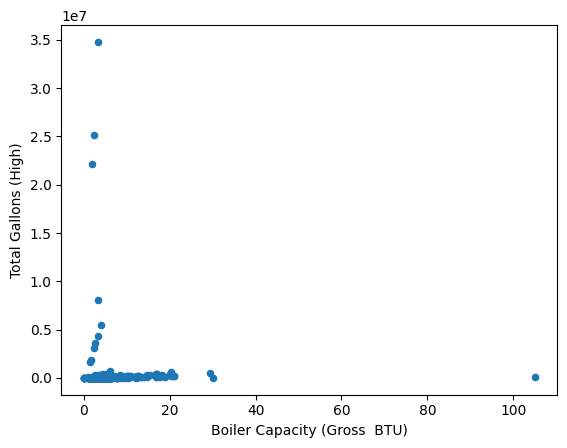

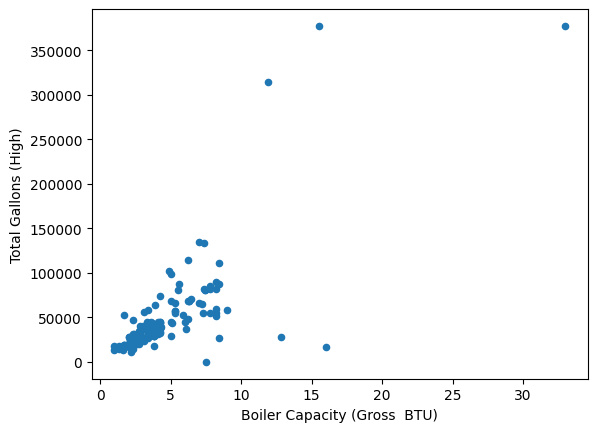

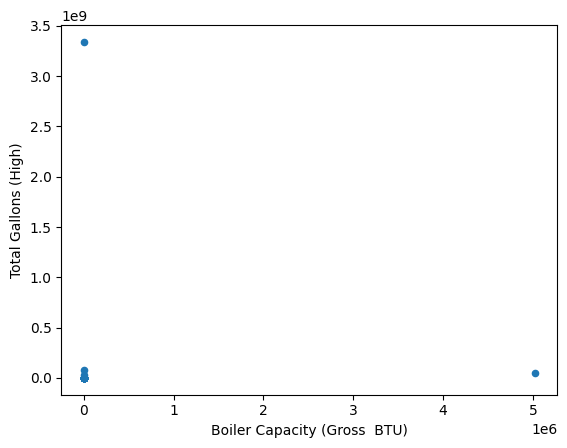

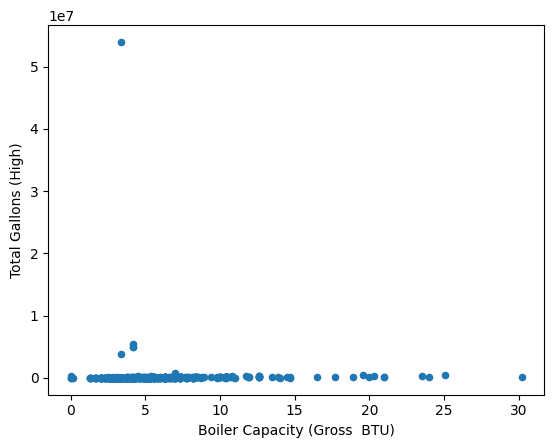

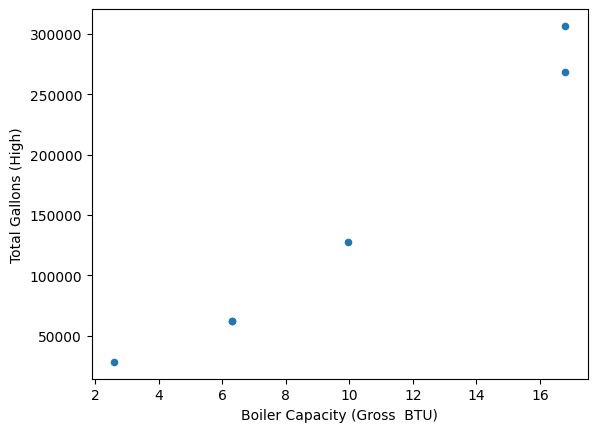

In [ ]:
boroughs.plot.scatter(x="Boiler Capacity (Gross  BTU)", y="Total Gallons (High)")

Here, we are making scatter plots of the Boiler Capacity vs. Total Gallons (High) for each of the boroughs, in the order of Bronx, Brooklyn, Manhattan, Queens, Staten Island. For the Bronx, it appears that the majority of their boilers have relatively small capacity, not surpassing 20 BTU and 1,000,000 gallons. Brooklyn boiler capacities are even lower, typically staying below 10 BTU and 150,000 gallons, which aligns with its second lowest emissions from the chart. Manhattan's are, again, the highest, with the greatest spread as well. Queens also has one giant outlier, but the rest of the points are typically below 1,000,000 gallons. Queen's Gross BTU has a very wide spread, though, ranging from 0 to ~31, showing that it has a wide range of types of buildings. Finally, Staten Island has a wide range of values for both axes, two points indicating both very high Boiler Capacity and very high Total Gallons (High), but these values still fall below those for the Bronx, Manhattan, and Queens, which does not align with the emissions chart.

In [ ]:
print("Total MMBTU (High) Statistics per Borough: \n\n", borough_stats["Total MMBTU (High)"])
print("\n")
print("Total MMBTU (Low) Statistics per Borough: \n\n", borough_stats["Total MMBTU (low)"])

Total MMBTU (High) Statistics per Borough: 

                 count          mean          std      min         25%  \
Borough                                                                 
Bronx          1498.0   4857.752225  4784.936167     0.00  2812.56500   
Brooklyn        129.0   4977.559978  4786.597199     0.00  2788.80000   
Manhattan      2597.0   6096.417397  5784.192185     0.00  3045.00000   
Queens          559.0   5915.525831  5049.299149     0.00  2991.11665   
Staten Island     6.0  12403.088333  9122.654777  2878.64  6335.12000   

                    50%         75%       max  
Borough                                        
Bronx          3906.875   5183.4575  75196.80  
Brooklyn       3755.850   5557.1250  38704.47  
Manhattan      4445.700   7216.5975  68985.00  
Queens         4771.410   6825.0000  42924.00  
Staten Island  9874.435  17150.4375  27059.90  


Total MMBTU (Low) Statistics per Borough: 

                 count          mean           std      min 

Here, we are looking at the Total MMBTU (High and Low) for each of the boroughs, which is just another way of looking at the total gallons. Both are a measure of how much heat the boiler produces. However, here, the data is different. Staten Island has the highest mean for both categories and the Bronx has the lowest, which aligns perfectly with the emissions chart and shows us that this is the more accurate way to analyze the data in terms of its energy output and and emission contributions.

In [ ]:
clean_heat["Estimated Boiler Age"] = clean_heat["Est. Retirement Year"] - clean_heat["Boiler Installation Date"]
boroughs = clean_heat.groupby("Borough")
borough_stats = boroughs.describe()
print("Estimated Boiler Age per Borough: \n\n", borough_stats["Estimated Boiler Age"])

Estimated Boiler Age per Borough: 

                 count       mean       std   min   25%   50%   75%   max
Borough                                                                 
Bronx          1498.0  35.312417  1.566557  35.0  35.0  35.0  35.0  55.0
Brooklyn        129.0  35.465116  4.179650   0.0  35.0  35.0  35.0  54.0
Manhattan      2597.0  35.544089  2.106944  35.0  35.0  35.0  35.0  59.0
Queens          559.0  35.524150  1.919259  35.0  35.0  35.0  35.0  54.0
Staten Island     6.0  35.000000  0.000000  35.0  35.0  35.0  35.0  35.0


Here, we are creating a new column that calculates the difference in the Est. Retirement Year and Boiler Installation Date to find the Estimated Boiler Age. This data is quite strange because almost every single row ends up being a difference of 35 years. Despite this, these findings are concerning because boilers should typically be replaced after about 15 years, which is 20+ years less than the consistent 35+ years we see here. This is bad because as a boiler ages, it becomes more inefficient and can therefore contribute more harshly toward pollution.

In [ ]:
mt_fraction4 = boroughs.get_group("Manhattan")["Primary Fuel"].value_counts()["#4"]/boroughs.get_group("Manhattan")["Primary Fuel"].count()
mt_fraction6 = boroughs.get_group("Manhattan")["Primary Fuel"].value_counts()["#6"]/boroughs.get_group("Manhattan")["Primary Fuel"].count()
bx_fraction4 = boroughs.get_group("Bronx")["Primary Fuel"].value_counts()["#4"]/boroughs.get_group("Bronx")["Primary Fuel"].count()
bx_fraction6 = boroughs.get_group("Bronx")["Primary Fuel"].value_counts()["#6"]/boroughs.get_group("Bronx")["Primary Fuel"].count()
qu_fraction4 = boroughs.get_group("Queens")["Primary Fuel"].value_counts()["#4"]/boroughs.get_group("Queens")["Primary Fuel"].count()
qu_fraction6 = boroughs.get_group("Queens")["Primary Fuel"].value_counts()["#6"]/boroughs.get_group("Queens")["Primary Fuel"].count()
bk_fraction4 = boroughs.get_group("Brooklyn")["Primary Fuel"].value_counts()["#4"]/boroughs.get_group("Brooklyn")["Primary Fuel"].count()
bk_fraction6 = boroughs.get_group("Brooklyn")["Primary Fuel"].value_counts()["#6"]/boroughs.get_group("Brooklyn")["Primary Fuel"].count()
si_fraction4 = boroughs.get_group("Staten Island")["Primary Fuel"].value_counts()["#4"]/boroughs.get_group("Staten Island")["Primary Fuel"].count()
si_fraction6 = boroughs.get_group("Staten Island")["Primary Fuel"].value_counts()["#6"]/boroughs.get_group("Staten Island")["Primary Fuel"].count()
total_fraction4 = clean_heat["Primary Fuel"].value_counts()["#4"]/clean_heat["Primary Fuel"].count()
total_fraction6 = clean_heat["Primary Fuel"].value_counts()["#6"]/clean_heat["Primary Fuel"].count()

fuel_fours = [mt_fraction4, bx_fraction4, qu_fraction4, bk_fraction4, si_fraction4, total_fraction4]
fuel_sixes = [mt_fraction6, bx_fraction6, qu_fraction6, bk_fraction6, si_fraction6, total_fraction6]
fuels = [fuel_fours, fuel_sixes]

print("Fraction of Primary Fuel #4 in Manhattan:", mt_fraction4)
print("Fraction of Primary Fuel #6 in Manhattan:", mt_fraction6)
print("Fraction of Primary Fuel #4 in Bronx:", bx_fraction4)
print("Fraction of Primary Fuel #6 in Bronx:", bx_fraction6)
print("Fraction of Primary Fuel #4 in Queens:", qu_fraction4)
print("Fraction of Primary Fuel #6 in Queens:", qu_fraction6)
print("Fraction of Primary Fuel #4 in Brooklyn:", bk_fraction4)
print("Fraction of Primary Fuel #6 in Brooklyn:", bk_fraction6)
print("Fraction of Primary Fuel #4 in Staten Island:", si_fraction4)
print("Fraction of Primary Fuel #6 in Staten Island:", si_fraction6)
print("Fraction of Primary Fuel #4 in the City:", total_fraction4)
print("Fraction of Primary Fuel #6 in the City:", total_fraction6)

Fraction of Primary Fuel #4 in Manhattan: 0.7354639969195226
Fraction of Primary Fuel #6 in Manhattan: 0.2645360030804775
Fraction of Primary Fuel #4 in Bronx: 0.7830440587449933
Fraction of Primary Fuel #6 in Bronx: 0.21695594125500667
Fraction of Primary Fuel #4 in Queens: 0.6171735241502684
Fraction of Primary Fuel #6 in Queens: 0.3828264758497317
Fraction of Primary Fuel #4 in Brooklyn: 0.7286821705426356
Fraction of Primary Fuel #6 in Brooklyn: 0.2713178294573643
Fraction of Primary Fuel #4 in Staten Island: 0.6666666666666666
Fraction of Primary Fuel #6 in Staten Island: 0.3333333333333333
Fraction of Primary Fuel #4 in the City: 0.7362706201712257
Fraction of Primary Fuel #6 in the City: 0.26372937982877426


Here, we are calculating the fractions of #4 and #6 fuels per borough and throughout the entire city, grouping them into new lists per fuel, and printing out our findings. We will analyze this data in a graph soon, but for now we can see that #4 fuel is primarily used throughout the city compared to #6 fuel, which ends up being the lesser of two evils. This means that the city could be doing worse but we are actively working toward better measures.

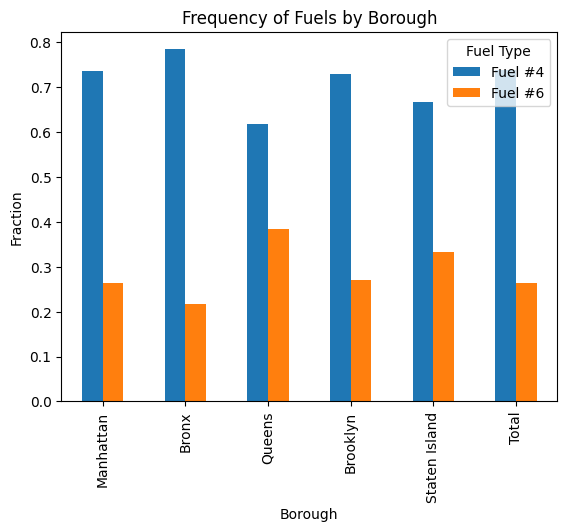

In [ ]:
fuel_data = {
    "Borough": ["Manhattan", "Bronx", "Queens", "Brooklyn", "Staten Island", "Total"],
    "Fuel #4": fuel_fours,
    "Fuel #6": fuel_sixes
}

fuels_df = pd.DataFrame(fuel_data)
fuels_df.set_index('Borough', inplace=True)

fuels_df.plot.bar()
plt.xlabel("Borough")
plt.ylabel("Fraction")
plt.title("Frequency of Fuels by Borough")
plt.legend(title="Fuel Type")
plt.show()

Here, we are making a bar plot of the #4 and #6 fuel fractions by borough. We can see that #4 fuel dominates in every borough, but Queens and Staten Island have the highest fractions of #6 users. This makes sense because they are two of the highest contributors to emissions based on the chart. Manhattan may be one of the other highest contributors not because of the type of fuel that is used but because of how many buildings/boilers there are that use any of these fuels at all. It is good that the majority of buildings throughout the city use #4 fuel instead of #6 fuel because #4 is the lesser of the two evils: it does not require preheating and therefore produces less energy and contributes slightly less to harmful emissions (HC3).

In [ ]:
mt_ggb_fraction = boroughs.get_group("Manhattan")["Greener Greater Buildings"].mean()
bx_ggb_fraction = boroughs.get_group("Bronx")["Greener Greater Buildings"].mean()
qu_ggb_fraction = boroughs.get_group("Queens")["Greener Greater Buildings"].mean()
bk_ggb_fraction = boroughs.get_group("Brooklyn")["Greener Greater Buildings"].mean()
si_ggb_fraction = boroughs.get_group("Staten Island")["Greener Greater Buildings"].mean()
total_ggb_fraction = clean_heat["Greener Greater Buildings"].mean()
print("Fraction of Greener Greater Buildings in Manhattan:", mt_ggb_fraction)
print("Fraction of Greener Greater Buildings in Bronx:", bx_ggb_fraction)
print("Fraction of Greener Greater Buildings in Queens:", qu_ggb_fraction)
print("Fraction of Greener Greater Buildings in Brooklyn:", bk_ggb_fraction)
print("Fraction of Greener Greater Buildings in Staten Island:", si_ggb_fraction)
print("Fraction of Greener Greater Buildings in the City:", total_ggb_fraction)

Fraction of Greener Greater Buildings in Manhattan: 0.614170196380439
Fraction of Greener Greater Buildings in Bronx: 0.5146862483311081
Fraction of Greener Greater Buildings in Queens: 0.6869409660107334
Fraction of Greener Greater Buildings in Brooklyn: 0.4418604651162791
Fraction of Greener Greater Buildings in Staten Island: 0.8333333333333334
Fraction of Greener Greater Buildings in the City: 0.5871789517644602


Here, we are finding the fraction of buildings that are part of the Greener Greater Buildings initiative by borough and throughout the city. We can use the mean function to do this because the only two values are 0 and 1. We can see that the majority of the buildings throughout the city are part of GGB, at 58.72%.

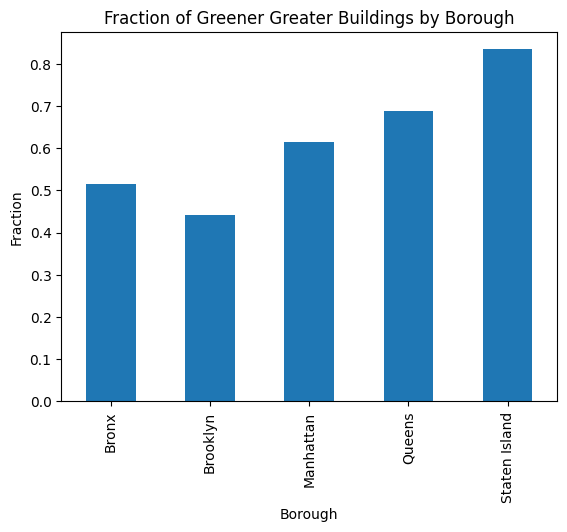

In [ ]:
boroughs["Greener Greater Buildings"].mean().plot.bar()
plt.title("Fraction of Greener Greater Buildings by Borough")
plt.ylabel("Fraction")
plt.show()

Here, we graph our findings about the GGB's. We can see that Staten Island has the greatest fraction of GGB's and Brooklyn has the smallest. Brooklyn may be behind in terms of GGB's, but it is also not a significant contributor to emissions according to the chart, so it makes sense that they're not in a rush to convert to GGB. Staten Island, however, is the primary contributor to emissions based on the chart and is therefore more encouraged to convert to GGB in order to restore balance.

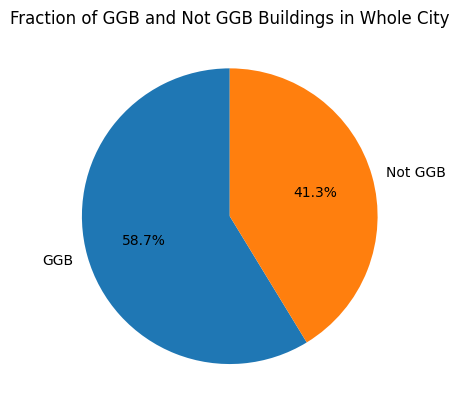

In [ ]:
clean_heat["Greener Greater Buildings"].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, labels=["GGB", "Not GGB"])
plt.title("Fraction of GGB and Not GGB Buildings in Whole City")
plt.ylabel("")
plt.show()

Here, we make a pie chart to depict the fractions of buildings across the city that are and are not considered GGB. Most of them are GGB, which is great!

In [ ]:
print("Types of Buildings in Manhattan:\n", boroughs.get_group("Manhattan")["Building Type"].value_counts(), "\n")
print("Types of Buildings in Bronx:\n", boroughs.get_group("Bronx")["Building Type"].value_counts(), "\n")
print("Types of Buildings in Queens:\n", boroughs.get_group("Queens")["Building Type"].value_counts(), "\n")
print("Types of Buildings in Brooklyn:\n", boroughs.get_group("Brooklyn")["Building Type"].value_counts(), "\n")
print("Types of Buildings in Staten Island:\n", boroughs.get_group("Staten Island")["Building Type"].value_counts(), "\n")
print("Types of Buildings in whole city:\n", clean_heat["Building Type"].value_counts())

Types of Buildings in Manhattan:
 Building Type
Elevator Apartments               1397
Walk-Up Apartments                 423
Office Buildings                   237
Condominiums                       215
Loft Buildings                     166
Hotels                              64
Educational Structures              28
Churches, Synagogues, etc.          22
Hospitals & Health                   9
Store Buildings                      7
Cultural & Public Assembly           7
Residence - Multi-Use                4
Asylums & Homes                      4
Vacant Land                          3
Warehouses                           2
Factory & Industrial Buildings       2
Garages & Gasoline Stations          2
Outdoor Recreation                   1
Utility Bureau                       1
Theatres                             1
Miscellaneous                        1
Selected Government                  1
Name: count, dtype: int64 

Types of Buildings in Bronx:
 Building Type
Elevator Apartments   

Here, we are looking at the different types of buildings in each borough. Manhattan consists of mainly elevator apartments, which indicates that it uses more energy/electricity and would therefore be a greater contributor to emissions. The Bronx has mainly both elevator and walk-up apartments, almost equally, which makes it less of a contributor to emissions than Manhattan because we're expending almost just as much human energy as non-human energy! Queens, Brooklyn, and Staten Island all have fewer buildings compared to the two boroughs we just discussed, making them smaller contributors. However, elevator apartment is the building type that dominates in all of the boroughs, which shows that this is where most of all of their emissions may be coming from. Furthermore, the only type of building in Staten Island is elevator apartment, so it makes sense why that borough is the highest contributor.

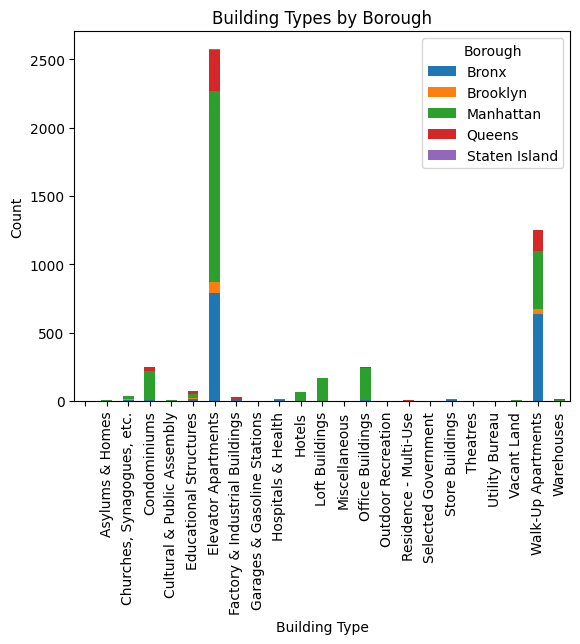

In [ ]:
borough_building_counts = boroughs["Building Type"].value_counts().unstack(level=0)
borough_building_counts.plot.bar(stacked=True)
plt.xlabel("Building Type")
plt.ylabel("Count")
plt.title("Building Types by Borough")
plt.legend(title="Borough")
plt.show()

Here, we're making a stacked bar graph of the data we just discussed. It makes it easier to see the primary types of buildings throughout the city (elevator apartments and walk-up apartments, respectively), and which boroughs have the most of each type of building. Manhattan houses the overwhelming majority of the elevator apartments, and the Bronx does the walk-up apartments, which reflects what we analyzed earlier. Also, Manhattan is the one borough that also hosts many other types of buildings, like condominiums, hotels, loft buildings, and office buildings, which also explains why it's such a high contributor to emissions: it has a lot of buildings and people in those buildings to satisfy and take care of.

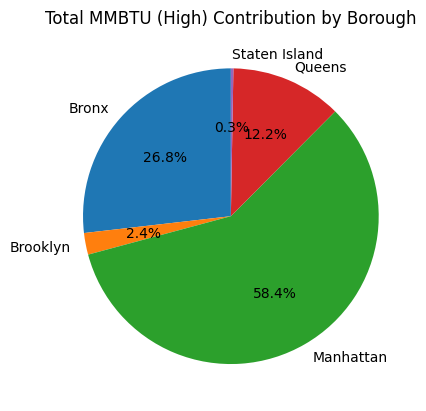

In [ ]:
borough_mmbtu_sum = clean_heat.groupby('Borough')['Total MMBTU (High)'].sum()
borough_mmbtu_sum.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Total MMBTU (High) Contribution by Borough')
plt.ylabel('')
plt.show()

Here, we are making a pie chart of the Total MMBTU (High) Contribution by Borough. We can see that Manhattan contributes the most MMBTU, and Staten Island contributes the least, which is probably just because of how much data we have for each borough, Manhattan having way more data points than Staten Island. We also see that the Bronx contributes about 26.8% of the MMBTU, which aligns with our findings from HC4, which show that the Bronx contributes about 29% of the whole city's carbon emissions (26.8% and 29% are quite close).

Beginning of analysis for Bedford Park-Fordham North neighborhood:



In [ ]:
nbhds = clean_heat.groupby("NTA")
nbhd_stats = nbhds.describe()
print("Boiler Capacity Statistics in Bedford Park-Fordham North: \n\n", nbhds.get_group("Bedford Park-Fordham North")["Boiler Capacity (Gross  BTU)"].describe())

Boiler Capacity Statistics in Bedford Park-Fordham North: 

 count    141.000000
mean       3.689078
std        1.694237
min        0.000000
25%        2.600000
50%        3.400000
75%        4.200000
max       12.630000
Name: Boiler Capacity (Gross  BTU), dtype: float64


Here, we group our data by NTA (neighborhood names) and print the Boiler Capacity statistics for Bedford Park-Fordham North (we'll abbreviate as Bedford-Fordham). We can see that the mean boiler capacity is 3.69 BTU, which is relatively low compared to what we've seen in the other boroughs earlier, making this neighborhood quite energy efficient. However, the maximum is 12.63, which is very far from the mean and would therefore most likely be an outlier. Maybe that one point is a comparatively large building and therefore needs a higher boiler capacity to suffice. The relatively low mean boiler capacity aligns with the fact that this neighborhood has very small households, ranging from 2-3 people per household on average (HC2). If there are fewer people, they won't use as much energy.

In [ ]:
print("Total Gallons (High) Statistics in Bedford Park-Fordham North: \n\n", nbhds.get_group("Bedford Park-Fordham North")["Total Gallons (High)"].describe())
print("\n")
print("Total Gallons (Low) Statistics in Bedford Park-Fordham North: \n\n", nbhds.get_group("Bedford Park-Fordham North")["Total Gallons (Low)"].describe())

Total Gallons (High) Statistics in Bedford Park-Fordham North: 

 count    1.410000e+02
mean     4.634472e+05
std      3.598687e+06
min      0.000000e+00
25%      2.628000e+04
50%      3.285000e+04
75%      4.496800e+04
max      3.477172e+07
Name: Total Gallons (High), dtype: float64


Total Gallons (Low) Statistics in Bedford Park-Fordham North: 

 count    1.410000e+02
mean     3.244131e+05
std      2.519081e+06
min      0.000000e+00
25%      1.839600e+04
50%      2.299500e+04
75%      3.147800e+04
max      2.434021e+07
Name: Total Gallons (Low), dtype: float64


Here, we are looking at the statistics of Total Gallons (High and Low) for Bedford-Fordham. The means are not very far from each other and neither are the maximums, given the range of the values, which shows that this data aligns with the Bronx's and this specific neighborhood's reputations for comparatively efficient energy usage/emissions. However, its mean is greater than the Bronx's overall for both categories, causing a disparity in how we might understand this neighborhood's efficiency. Maybe it has larger buildings that need more gallons but at the same time use less energy, for example in a walk-up apartment that may house more people than an elevator apartment.

<Axes: xlabel='Boiler Capacity (Gross  BTU)', ylabel='Total Gallons (High)'>

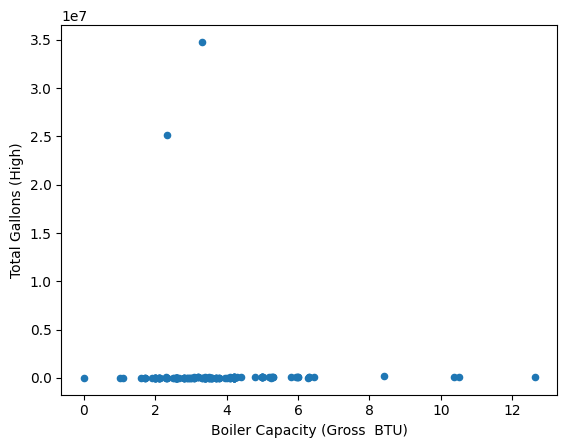

In [ ]:
nbhds.get_group("Bedford Park-Fordham North").plot.scatter(x="Boiler Capacity (Gross  BTU)", y="Total Gallons (High)")

Here, we are making a scatter plot of the Boiler Capacity vs. the Total Gallons (High) for the Bedford-Fordham neighborhood specifically. This neighborhood is on the lower side of the Bronx's boiler statistics that we looked at earlier, typically staying below 7 BTU and 1,000,000 gallons, compared to the overall Bronx's less than 20 BTU. The boilers in this neighborhood are thus typically smaller and contribute less to emissions.

<Axes: ylabel='Frequency'>

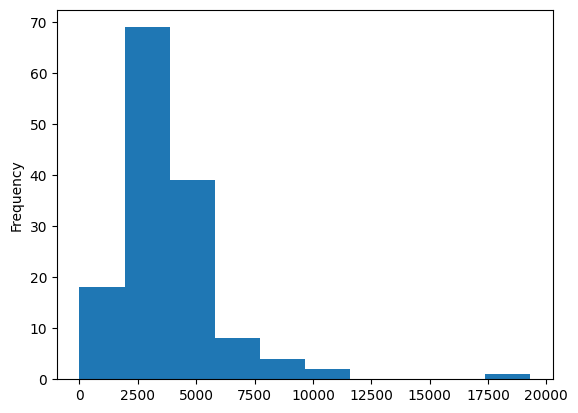

In [ ]:
nbhds.get_group("Bedford Park-Fordham North")["Total MMBTU (High)"].plot.hist()

Here, we are making a histogram of Bedford-Fordham's distribution of Total MMBTU (High). Most of the MMBTU is concentrated at between 2500 and 5000 MMBTU, which is typically smaller than the means of all the boroughs that we looked at earlier, further proving this neighborhood's relative efficiency.

Beginning of analysis for Soundview neighborhood:

In [ ]:
zipcode_group = clean_heat.groupby('Postcode')
print("Boiler Capacity Statistics in Soundview: \n\n", zipcode_group.get_group(10472)["Boiler Capacity (Gross  BTU)"].describe())

Boiler Capacity Statistics in Soundview: 

 count     58.000000
mean       6.495172
std       13.414746
min        1.500000
25%        3.430000
50%        4.150000
75%        5.315000
max      105.000000
Name: Boiler Capacity (Gross  BTU), dtype: float64


Here, we are grouping our data by Postcode and printing the Boiler Capacity for Soundview's zipcode, 10472. Soundview's mean boiler capacity is almost double Bedford-Fordham's and is greater than the Bronx's overall. However, its standard deviation is also very high and it has a maximum of 105 BTU, which is definitely an outlier. Thus, Soundview is less energy efficient than the rest of the Bronx (that we have looked at), which might be because of larger buildings.

In [ ]:
print("Total Gallons (High) Statistics in Soundview: \n\n", zipcode_group.get_group(10472)["Total Gallons (High)"].describe())
print("\n")
print("Total Gallons (Low) Statistics in Soundview: \n\n", zipcode_group.get_group(10472)["Total Gallons (Low)"].describe())

Total Gallons (High) Statistics in Soundview: 

 count        58.000000
mean      46852.275862
std       28422.388384
min           0.000000
25%       29675.000000
50%       40004.000000
75%       56839.250000
max      134685.000000
Name: Total Gallons (High), dtype: float64


Total Gallons (Low) Statistics in Soundview: 

 count       58.000000
mean     32796.655172
std      19895.699117
min          0.000000
25%      20772.000000
50%      28003.000000
75%      39787.500000
max      94280.000000
Name: Total Gallons (Low), dtype: float64


Here, we're looking at the Total Gallons (High and Low) of Soundview, which are both lower than the Bronx's overall and Bedford-Fordham's. This might be because Soundview has smaller buildings, which contradicts with the Boiler Capacity statistics we just looked at. Maybe Soundview has larger boilers that are able to use more gallons but do not do so because they don't need to. For example, the use of a building and its appliances might have changed over time, so a larger boiler is no longer necessary for its needs but still stands there regardless. The standard deviations are also very large, though, and the maximums are very high, so there definitely are some less energy efficient buildings in this neighborhood.

<Axes: xlabel='Boiler Capacity (Gross  BTU)', ylabel='Total Gallons (High)'>

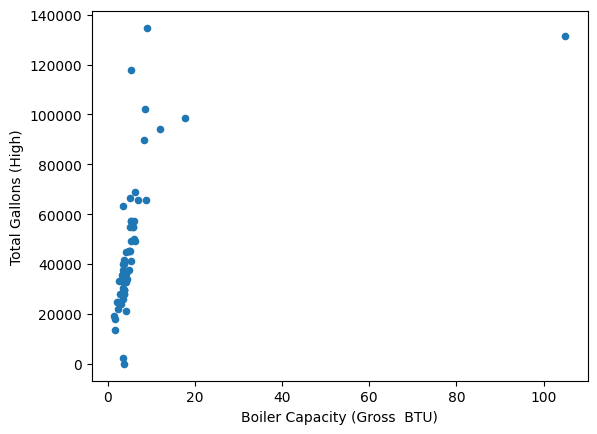

In [ ]:
zipcode_group.get_group(10472).plot.scatter(x="Boiler Capacity (Gross  BTU)", y="Total Gallons (High)")

Here, we make a scatter plot of Soundview's Boiler Capacity vs. Total Gallons (High). The points are typically significantly smaller than the Bronx's overall, as well as Bedford-Fordham's, staying below 10 BTU and 140,000 gallons, but there is one significant outlier (which we can also see in the Bronx's scatter plot that we made earlier, it's the same data point). This shows that Soundview is definitely more energy efficient than the rest of the Bronx, on average, despite that one outlier.

<Axes: ylabel='Frequency'>

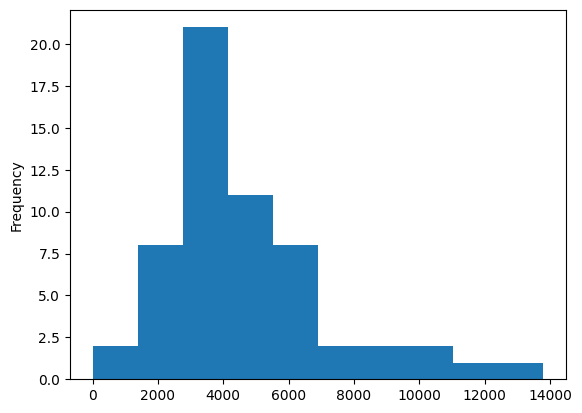

In [ ]:
zipcode_group.get_group(10472)["Total MMBTU (High)"].plot.hist()

Here, we make a histogram of Soundview's distribution of Total MMBTU (High), which is skewed right. The Total MMBTU (High) typically stays within a range of 2000 and 6000 MMBTU, peaking at 3000 MMBTU, which is less than the Bronx's overall mean, further proving that Soundview is relatively energy efficient. The data here is also quite similar to Bedford-Fordham's, whose peak Total MMBTU (High) ends up being only slightly less than Soundview's, at 2500 MMBTU.